In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
from caits.visualization import plot_signal
from IPython.display import Audio

In [3]:
DATA_PATH = "data/"

# Wav file Specifications

check audio type

In [4]:
from caits.loading import wav_specs_check

In [5]:
audio_params = wav_specs_check(DATA_PATH + "instances/yes.wav")

Sample rate: 16000 Hz
Mono


In [6]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

# Load an audio - yes.wav

In [7]:
from caits.loading import wav_loader, wav_specs_check

yes_audio_df = wav_loader(file_path=DATA_PATH + "instances/yes.wav")
yes_audio = yes_audio_df["Ch_1"].values

In [8]:
audio_params = wav_specs_check(DATA_PATH + "instances/yes.wav")
yes_sr = audio_params["framerate"]
print(yes_sr)

Sample rate: 16000 Hz
Mono
16000


In [9]:
type(yes_audio)

numpy.ndarray

In [10]:
yes_audio.shape

(16000,)

In [11]:
import numpy as np
# Calculate time differences and average
time_diffs = np.diff(yes_audio)
sampling_rate = 1 / np.mean(time_diffs)
print("Sampling rate:", sampling_rate, "Hz")

Sampling rate: -52425523.2 Hz


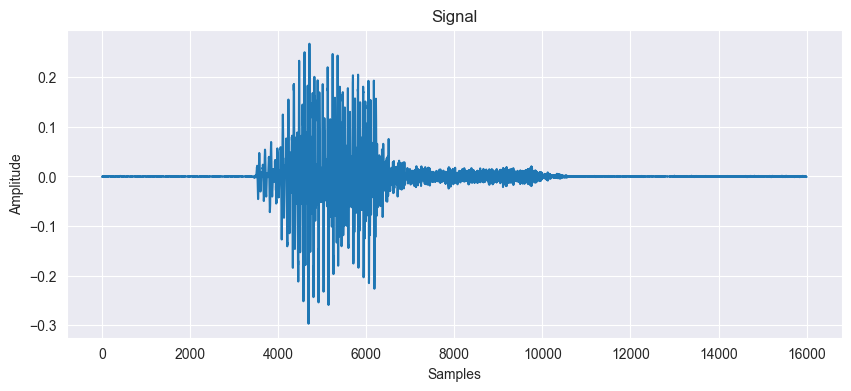

In [11]:
plot_signal(yes_audio, return_mode=False)

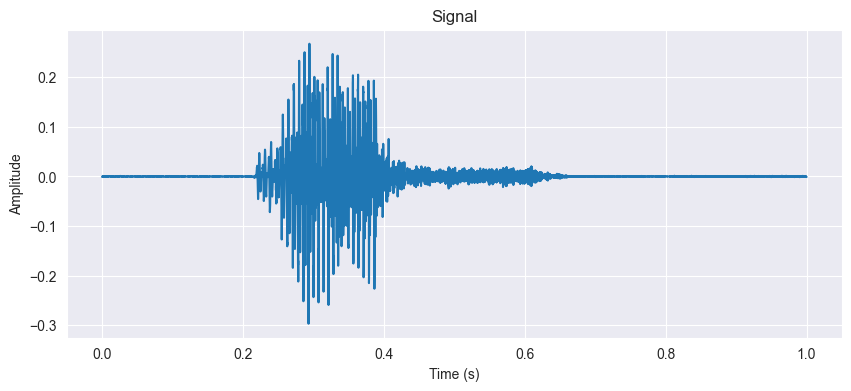

In [12]:
plot_signal(yes_audio, sr=yes_sr, mode="time", return_mode=False)

In [13]:
Audio(yes_audio, rate=yes_sr)

## Load another audio - hiphop.wav

In [14]:
hiphop_audio_df = wav_loader(file_path=DATA_PATH + "instances/hiphop.wav")
hiphop_audio = hiphop_audio_df["Ch_1"].values

In [15]:
audio_params_hp = wav_specs_check(DATA_PATH + "instances/hiphop.wav")

Sample rate: 22050 Hz
Mono


In [16]:
hiphop_sr = audio_params_hp["framerate"]
print(hiphop_sr)

22050


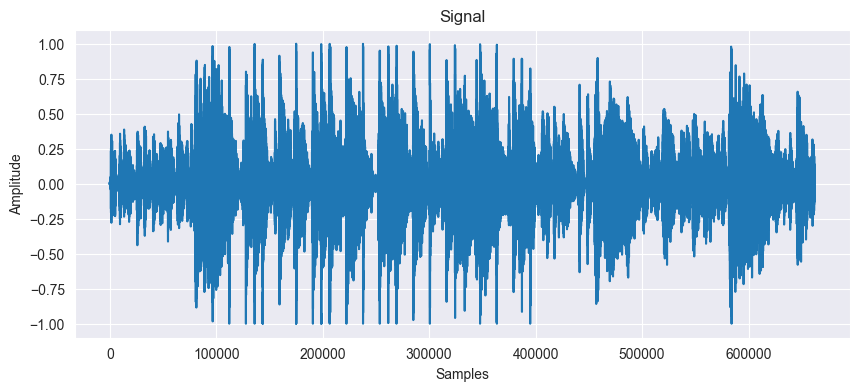

In [17]:
plot_signal(hiphop_audio, return_mode=False)

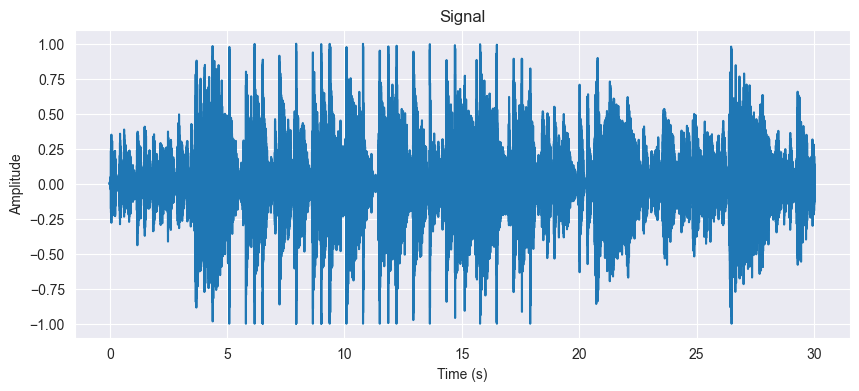

In [18]:
plot_signal(hiphop_audio, sr=hiphop_sr, mode="time", return_mode=False)

# Normalization of audio

In [19]:
from caits.loading import wav_loader
from caits.preprocessing import normalize_signal

Load using `caits` wav loader function

In [20]:
signal = wav_loader(mode="pydub", file_path=DATA_PATH + "instances/yes.wav")

In [21]:
type(signal)

pandas.core.frame.DataFrame

In [22]:
signal.shape

(16000, 1)

In [23]:
signal.head()

,Ch_1
0,-25
1,-27
2,-24
3,-18
4,-14


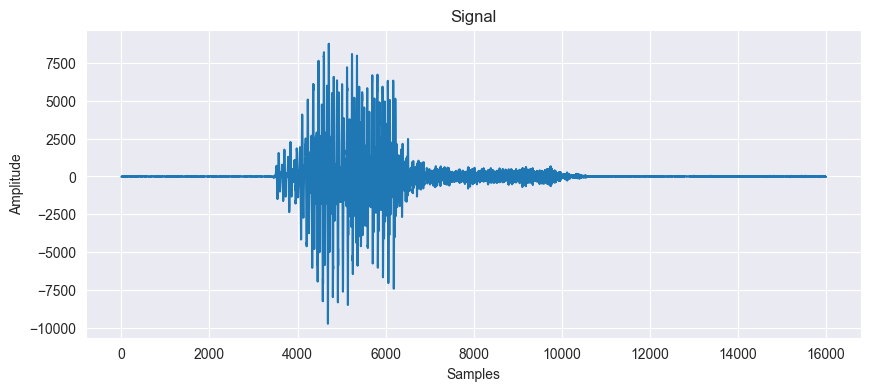

In [24]:
plot_signal(signal["Ch_1"], return_mode=False)

In [25]:
signal_norm = normalize_signal(signal["Ch_1"])

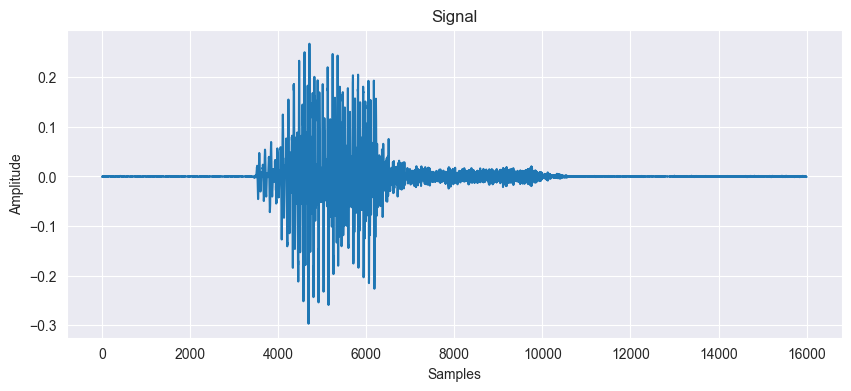

In [26]:
plot_signal(signal_norm, return_mode=False)

# Resampling

In [27]:
from caits.preprocessing import resample_signal

In [28]:
sr_transform = 4000

In [29]:
rsmpl_yes = resample_signal(yes_audio, native_sr=yes_sr, target_sr=sr_transform)

In [30]:
rsmpl_yes.shape

(4000,)

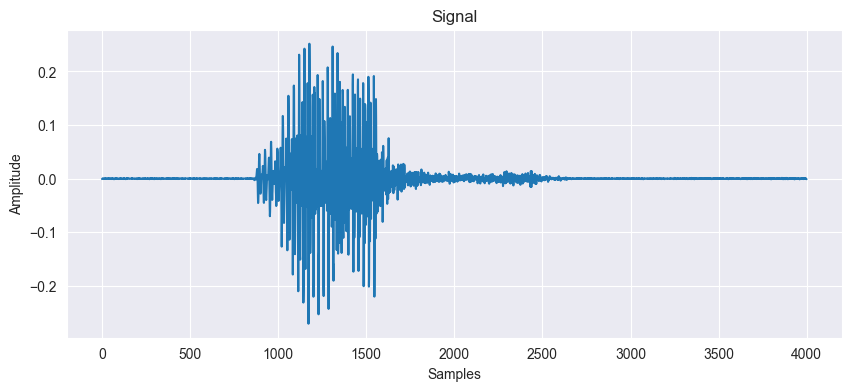

In [31]:
plot_signal(rsmpl_yes, return_mode=False)

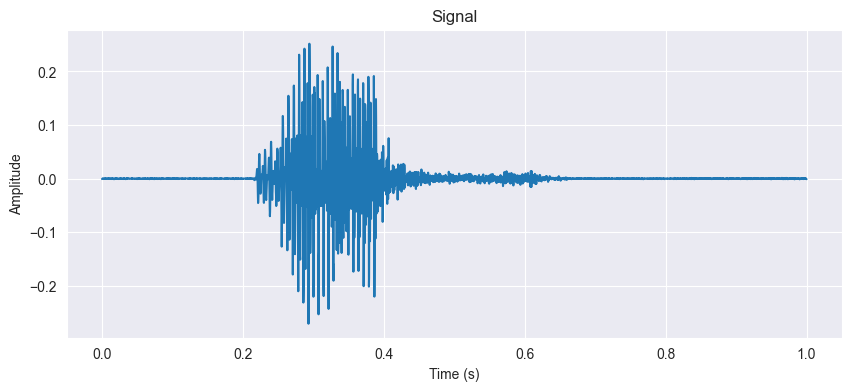

In [32]:
plot_signal(rsmpl_yes, sr=sr_transform, mode="time", return_mode=False)

In [33]:
sr_transform = 8000

In [34]:
rsmpl_hiphop = resample_signal(hiphop_audio, native_sr=hiphop_sr, target_sr=sr_transform)

In [35]:
rsmpl_hiphop.shape

(240106,)

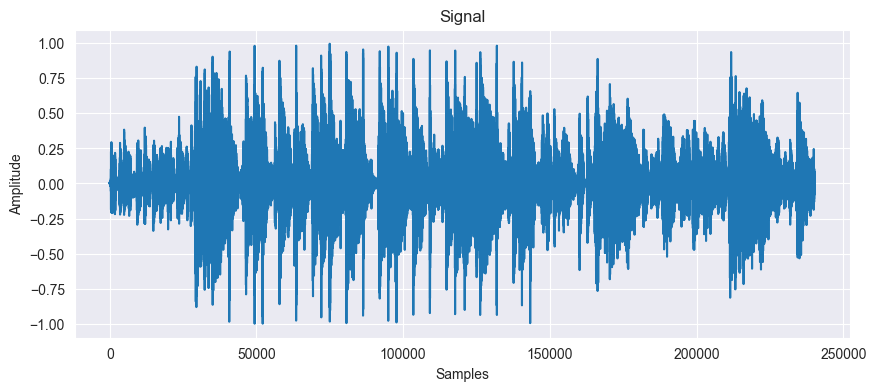

In [36]:
plot_signal(rsmpl_hiphop, return_mode=False)

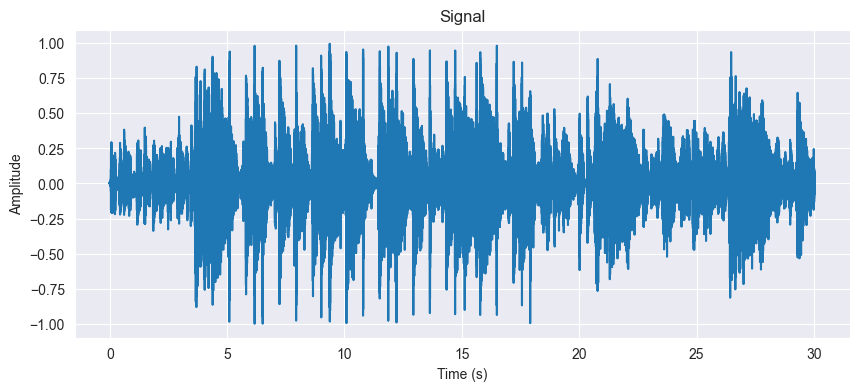

In [37]:
plot_signal(rsmpl_hiphop, sr=sr_transform, mode="time", return_mode=False)

# Trim

In [38]:
from caits.preprocessing import trim_signal

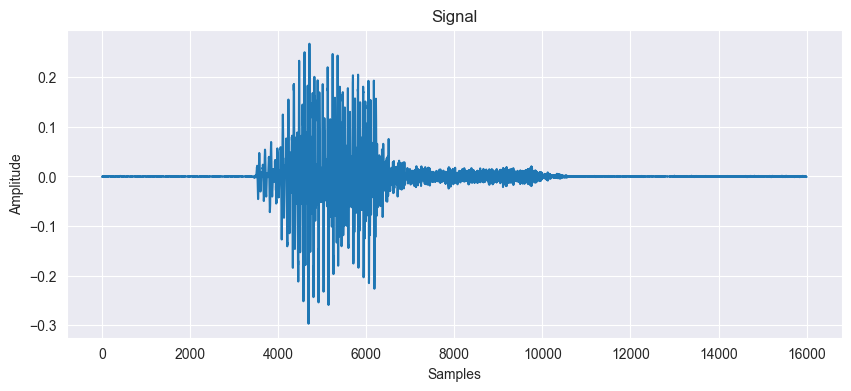

In [39]:
plot_signal(yes_audio, return_mode=False)

In [40]:
sig_trim = trim_signal(yes_audio, axis=0, epsilon=0.008)

In [41]:
sig_trim.shape

(6611,)

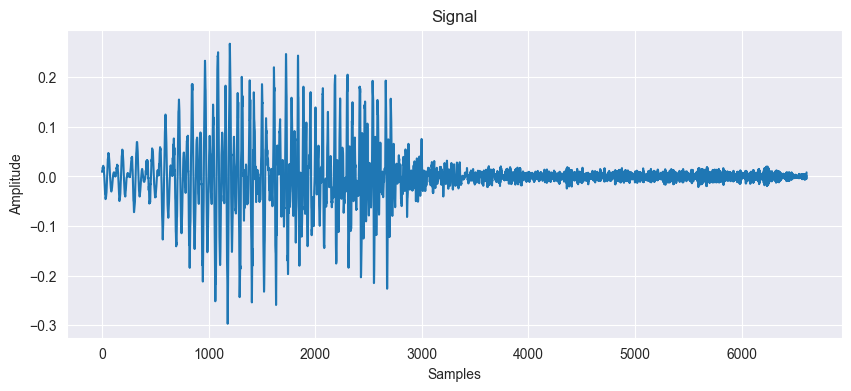

In [42]:
plot_signal(sig_trim, return_mode=False)

In [43]:
Audio(sig_trim, rate=yes_sr)

# Resampling 2D - Multiple channels

In [44]:
from caits.preprocessing import resample_2d

In [45]:
audio_params = wav_specs_check(DATA_PATH + "instances/yes.wav")

Sample rate: 16000 Hz
Mono


In [46]:
sr = audio_params["framerate"]

In [47]:
signal = wav_loader(file_path=DATA_PATH + "instances/yes.wav")

In [48]:
signal.shape

(16000, 1)

In [49]:
rsmpl_yes = resample_2d(signal.values, native_sr=sr, target_sr=sr_transform)

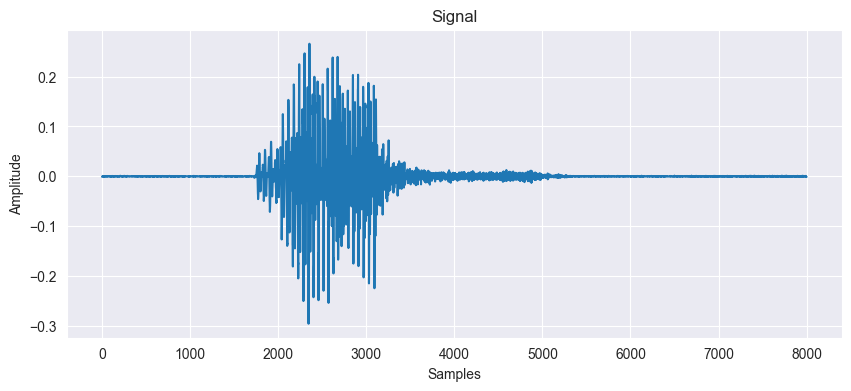

In [50]:
plot_signal(rsmpl_yes, return_mode=False)

In [51]:
from caits.loading import wav_loader
import pydub
from caits.fe import dBFS

In [52]:
signal_df = wav_loader(mode="pydub", file_path=DATA_PATH + "instances/yes.wav")
sig = signal_df["Ch_1"].values

In [53]:
sig.dtype

dtype('int16')

In [54]:
sig_params = wav_specs_check(DATA_PATH + "instances/yes.wav")
print(sig_params)

Sample rate: 16000 Hz
Mono
{'nchannels': 1, 'sampwidth': 2, 'framerate': 16000, 'nframes': 16000, 'comptype': 'NONE', 'compname': 'not compressed'}


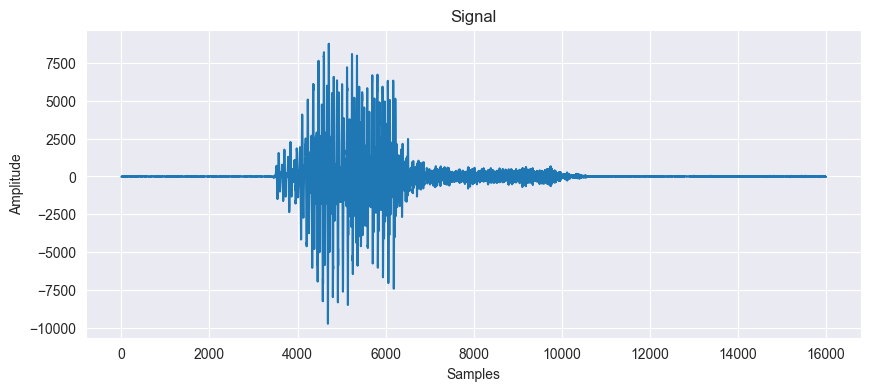

In [55]:
plot_signal(sig, return_mode=False)

In [56]:
dBFS(sig, sample_width=audio_params["sampwidth"])

-28.814982903712153

In [57]:
aud = pydub.AudioSegment.from_wav(DATA_PATH + "instances/yes.wav")

In [58]:
aud.dBFS

-28.81998432010253

In [59]:
from caits.fe._loudness import rms_dbfs
from caits.fe import rms_value

In [60]:
sig.shape

(16000,)

In [61]:
rms_dbfs(sig)

1187.6836825045211

In [62]:
rms_value(sig)

30.555681754789894

In [63]:
import numpy as np

In [64]:
signal_test = np.array(range(0,))

In [65]:
np.sqrt(np.mean(np.square(sig.astype(np.float64))))

1187.6836825045211

In [66]:
np.sqrt(np.mean(np.square(sig)))

30.555681754789894

In [67]:
np.sqrt(np.mean(np.square(sig, dtype=np.int16)))

30.555681754789894

In [68]:
sig.dtype

dtype('int16')

Sampling rate: -1599.9 Hz
